# Regression
- Supervised machine learning algorithm
- Key word `Continuous data`

A regression algorithm attempts to find the function that best 'mimics' or 'models' the relationship between independent feature(s) and dependent target variable(s). The algorithm does this by finding the line (for simple regression) or plane (for multiple regression) that minimizes the errors in our predictions when compared to the labeled data. Once we acquire that function, it can be used to make predictions on new observations when they become available; we can simply run these new values of the independent variable(s) through the function for each observation to predict the dependent target variable(s).


#### Simple Linear Regression

    y = b0 + b1x + C
    
    where:
        x - feature of interest
        y - target
        b1 - slope
        bo - y intercept
        
#### Multiple Linear Regression

    y = b0 + b1x1 + b2x2 + ... bnxn + ϵ
    
    where:
        x1 ... xn - features of interest
    
#### Polynomial Regression
    y = b0 + b1x + b2x2 + ...+bnxn + ϵ
    

## Acquire Data

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

In [52]:
# Read csv file into pandas DataFrame.
file = "https://gist.githubusercontent.com/ryanorsinger/14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"
df = pd.read_csv(file)
df.head(n = 2)

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95


In [53]:
df.shape

(104, 5)

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,104.0,52.500000,30.166206,1.0,26.75,52.5,78.25,104.0
exam1,103.0,78.621359,14.260955,57.0,70.00,79.0,92.00,100.0
exam2,104.0,77.307692,10.295703,65.0,70.00,75.0,89.00,93.0
final_grade,104.0,81.692308,10.918122,65.0,72.00,81.0,93.00,97.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [56]:
df.isna().sum()

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64

In [57]:
df.exam3.value_counts()

96    16
78    16
75    15
95     8
87     8
86     8
85     8
94     8
79     8
70     8
       1
Name: exam3, dtype: int64

In [58]:
# Drop white spaces
df = df.replace(r'^\s*$', np.nan, regex=True)

In [59]:
# Drop nulls 
df.dropna(inplace = True)

In [60]:
# Convert to int type
df = df.astype('int')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


<Figure size 1152x432 with 0 Axes>

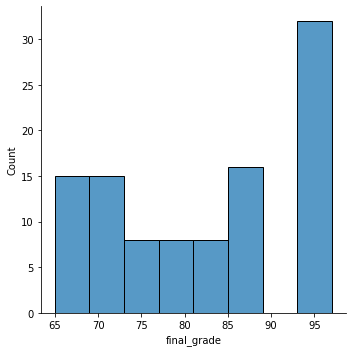

In [62]:
plt.figure(figsize = (16, 6))

sns.displot(data = df, x = 'final_grade')
None

In [63]:
df.columns

Index(['student_id', 'exam1', 'exam2', 'exam3', 'final_grade'], dtype='object')

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

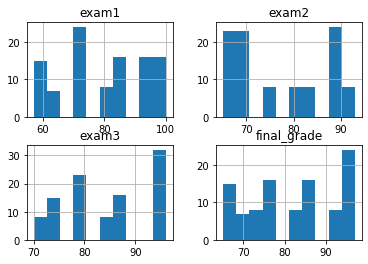

In [64]:
plt.figure(figsize = (16, 6))

plt.figure(figsize = (16, 6))
df.drop(columns = 'student_id').hist()
plt.show()

### Data scaling 

- Recommended to be performed between initial data exploration and feature engineering immediately after splitting data 
- Annotate scaled data as x^i and non-scaled data as x 
- Scaling should be independent of features
- Data scAled can be linear or non-linear

        - In a linear scaling operation there is a linear correspondence between the original and the scaled value. A linear scaling operation maintains the "shape" of the distribution data and the space between data points is preserved. 
        - A non-linear scaling operation changes the shape of the data, and the distance between the points is not preserved. Example when we wish to use a statistical test that assumes normality, but our data is not normally distributed. 

## Exploration

In [65]:
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
import warnings 
warnings.filterwarnings('ignore')

### Choice of visuals summary

Univariate Distributions

    - Histograms 
    - Displot
    - Boxplot
    - Countplot
    
Continuous with Continuous 

    - Pairplot
    - Relplot
    - Lmplot
    - Jointplot
    - Heatmap
    
Continuous with Discrete

    - Swarmplot
    - Stripplot
    - Boxplot
    - Violinplot
    - Barplot


Discrete with Discrete

    - Crosstab with heatmap
    

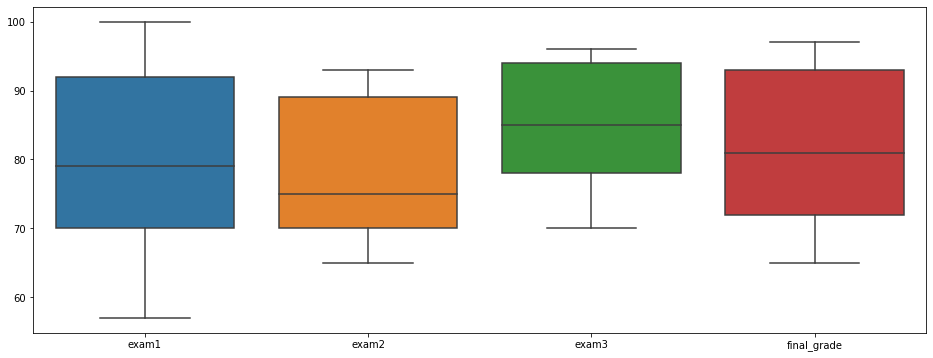

In [66]:
plt.figure(figsize = (16, 6))

sns.boxplot(data = df.drop(columns = 'student_id'))
None

<Figure size 1152x432 with 0 Axes>

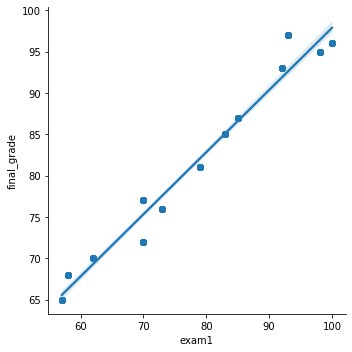

In [67]:
plt.figure(figsize = (16, 6))

sns.lmplot(x = 'exam1', y = 'final_grade', data = df)

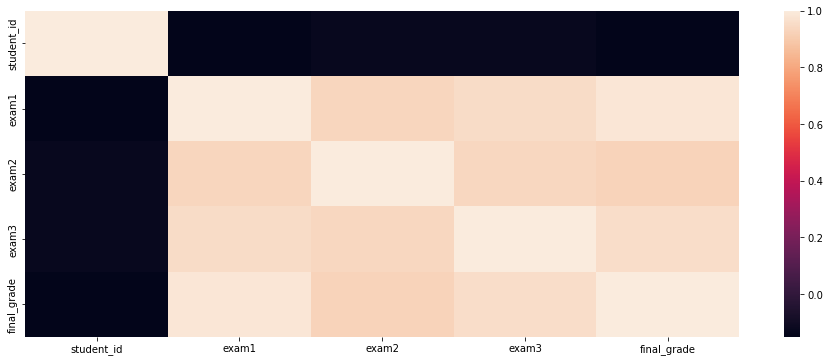

In [68]:
plt.figure(figsize = (16, 6))

sns.heatmap(df.corr())
None

In [69]:
df['score_index'] = df.loc[:,'final_grade':].apply(lambda x: pd.qcut(x, q=[0, 0.25, 0.75, 1.0], 
                                    labels =['low','medium','high']) 
                                    if not x.nunique() == 1 else 'low')


<AxesSubplot:xlabel='score_index', ylabel='final_grade'>

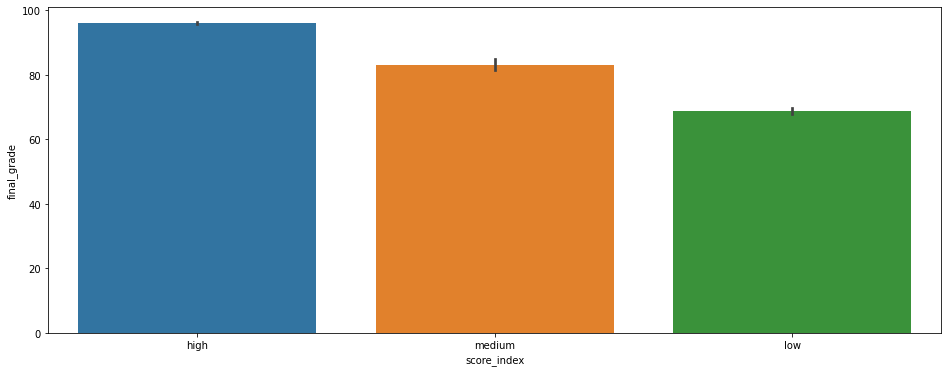

In [70]:
plt.figure(figsize = (16, 6))

sns.barplot(x = 'score_index', y = 'final_grade', data = df)

### Split Data

In [71]:
train_validate, test = train_test_split(df, test_size = 0.2, 
                                        random_state = 123)

train, validate = train_test_split(train_validate, test_size = 0.3, 
                                   random_state = 123)

train.shape, validate.shape, test.shape

((56, 6), (25, 6), (21, 6))

## Goal 

Build a prediction model that will be able to use these exams to predict the `final grade` within 5 points average per student.


Notes:

- Since my target variable is continuous, final_grade, this is a regression problem. 
- Multiple linear regression analysis makes several key assumptions:

      (a). There must be a linear relationship between the outcome variable and the independent variables. (Scatterplots can show whether there is a linear or curvilinear relationship).
         
      (b). No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.
       
      (c). Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.

In [72]:
# Correlation Matrix for all exams
exam_corr = train.drop(columns = 'student_id').corr()
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.933110,0.940733,0.986033
exam2,0.933110,1.000000,0.937750,0.930982
exam3,0.940733,0.937750,1.000000,0.949790
final_grade,0.986033,0.930982,0.949790,1.000000


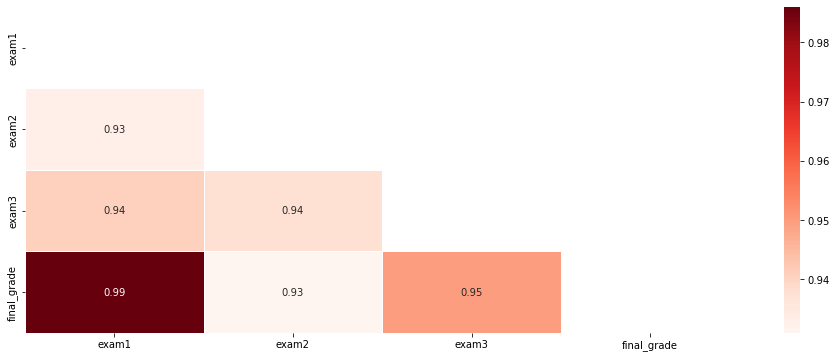

In [73]:
plt.figure(figsize = (16, 6))

sns.heatmap(exam_corr, 
            cmap = 'Reds', 
            annot = True, 
            linewidth = 0.5, 
            mask = np.triu(exam_corr)
           )
None

## <a href = 'https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8'>Difference Between Pearson vs Spearman</a>

The fundamental difference between the two correlation coefficients is that the `Pearson coefficient works with a linear relationship between the two variables whereas the Spearman Coefficient works with monotonic relationships as well`. (Mono-atomic relationship is one where two variables correlate but at different rate a.k.a. not linearly ).

    Pearson - Linear relationship + raw data
    Spearman - mono-atomic relationship + rank ordered values

### Pearson R

In [74]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r , p_value = pearsonr(train.exam1, train.final_grade)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9860332649385697
P-value: 1.006510436697437e-43


In [75]:
# Since variables are not normally distributed, I might choose Spearman instead.

exam_spearman = train.drop(columns=['student_id']).corr(method='spearman')
exam_spearman

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.940463,0.918660,0.987083
exam2,0.940463,1.000000,0.929203,0.910915
exam3,0.918660,0.929203,1.000000,0.930853
final_grade,0.987083,0.910915,0.930853,1.000000


### Spearman R

In [76]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train.exam1, train.final_grade)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.9870830318356753
P-value: 1.2369246014330318e-44
